In [1]:
import tensorflow as tf
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense,Input,InputLayer,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
 tf.config.threading.set_inter_op_parallelism_threads(32)

In [4]:
import cv2 as cv
import random

In [5]:
def create_dataset(img_folder):
    img_data_array=[]
    class_name=[]
    for dir1 in os.listdir(img_folder):
         #print(dir1)
        for file in os.listdir(os.path.join(img_folder,dir1)):
            img=cv.imread(os.path.join(img_folder,dir1,file),cv.IMREAD_GRAYSCALE)
            img=cv.resize(img,(224,224),interpolation=cv.INTER_LANCZOS4)
            img=img.astype('float32')
            img/=255.0
            img_data_array.append(img)
            class_name.append(dir1)
    return img_data_array,class_name
img_data,class_name=create_dataset(r"/kaggle/input/brain-tumor-mri-dataset/Training")
            

In [6]:
len(img_data)

5712

In [7]:
def create_dataset(img_folder):
    img_data_array=[]
    class_name=[]
    for dir1 in os.listdir(img_folder):
         #print(dir1)
        for file in os.listdir(os.path.join(img_folder,dir1)):
            img=cv.imread(os.path.join(img_folder,dir1,file),cv.IMREAD_GRAYSCALE)
            img=cv.resize(img,(224,224),interpolation=cv.INTER_LANCZOS4)
            img=img.astype('float32')
            img/=255.0
            img_data_array.append(img)
            class_name.append(dir1)
    return img_data_array,class_name
img_data1,class_name1=create_dataset(r"/kaggle/input/brain-tumor-mri-dataset/Testing")
            

In [8]:
len(class_name1)

1311

In [9]:
img_data.extend(img_data1)

In [10]:
len(img_data)

7023

In [11]:
class_name.extend(class_name1)

In [12]:
set(class_name)

{'glioma', 'meningioma', 'notumor', 'pituitary'}

In [13]:
import numpy as np
target_dict={k:v for v,k in enumerate(np.unique(class_name))}
target_dict

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [14]:
target_val=[target_dict[class_name[i]] for i in range(len(class_name))]

In [15]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# sample class vector
target_val= np.array(target_val)

# convert to binary class matrix
target_val= to_categorical(target_val, num_classes=4)
len(target_val)

7023

In [16]:
X_train=np.array(tf.expand_dims(img_data,axis=-1), np.float32)

2023-02-05 04:23:48.792208: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-05 04:23:48.897872: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-05 04:23:48.899085: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-05 04:23:48.906887: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [17]:
X_train.shape

(7023, 224, 224, 1)

In [18]:
Y_train=np.array(target_val, np.uint32)
Y_train.shape

(7023, 4)

In [19]:
num_classes=4
img_rows=224
img_cols=224

In [20]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001)

In [21]:
es=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [56]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.resnet import decode_predictions
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model,Sequential,load_model
from tensorflow.keras.layers import Input,ZeroPadding2D,Activation,Add
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
import tensorflow as tf
from PIL import Image 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
import numpy as np 
import os 
from tensorflow.keras.initializers import glorot_uniform

In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dense
from tensorflow.keras.layers import AvgPool2D, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ReLU, concatenate
import tensorflow.keras.backend as K
# Creating Densenet121
def densenet(input_shape, n_classes, filters = 32):
    
    #batch norm + relu + conv
    def bn_rl_conv(x,filters,kernel=1,strides=1):
        
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(filters, kernel, strides=strides,padding = 'same')(x)
        return x
    
    def dense_block(x, repetition):
        
        for _ in range(repetition):
            y = bn_rl_conv(x, 4*filters)
            y = bn_rl_conv(y, filters, 3)
            x = concatenate([y,x])
        return x
        
    def transition_layer(x):
        
        x = bn_rl_conv(x, K.int_shape(x)[-1] //2 )
        x = AvgPool2D(2, strides = 2, padding = 'same')(x)
        return x
    
    input = Input (input_shape)
    x = Conv2D(64, 7, strides = 2, padding = 'same')(input)
    x = MaxPool2D(3, strides = 2, padding = 'same')(x)
    
    for repetition in [6,12,24,16]:
        
        d = dense_block(x, repetition)
        x = transition_layer(d)
    x = GlobalAveragePooling2D()(d)
    x=Dense(2048, activation='relu',name="final")(x)
    output = Dense(n_classes, activation = 'softmax')(x)
    
    model = Model(input, output)
    return model
input_shape = 224, 224, 1
n_classes = 4
model = densenet(input_shape,n_classes)
# model.summary()

In [24]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [25]:
history=model.fit(X_train,Y_train,batch_size=20,epochs=50,validation_split=0.2)

2023-02-05 04:24:23.525651: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1127555072 exceeds 10% of free system memory.
2023-02-05 04:24:24.773803: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1127555072 exceeds 10% of free system memory.
2023-02-05 04:24:25.696887: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2023-02-05 04:24:38.504822: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


281/281 [==============================] - 64s 160ms/step - loss: 0.8852 - accuracy: 0.6721 - val_loss: 1.9702 - val_accuracy: 0.2612
Epoch 2/50
281/281 [==============================] - 41s 146ms/step - loss: 0.6527 - accuracy: 0.7529 - val_loss: 0.9078 - val_accuracy: 0.6014
Epoch 3/50
281/281 [==============================] - 43s 154ms/step - loss: 0.5454 - accuracy: 0.7944 - val_loss: 1.5007 - val_accuracy: 0.5189
Epoch 4/50
281/281 [==============================] - 41s 146ms/step - loss: 0.5852 - accuracy: 0.7837 - val_loss: 3.5204 - val_accuracy: 0.3509
Epoch 5/50
281/281 [==============================] - 41s 146ms/step - loss: 0.4788 - accuracy: 0.8259 - val_loss: 2.2486 - val_accuracy: 0.4975
Epoch 6/50
281/281 [==============================] - 41s 146ms/step - loss: 0.4247 - accuracy: 0.8375 - val_loss: 1.1508 - val_accuracy: 0.6762
Epoch 7/50
281/281 [==============================] - 41s 146ms/step - loss: 0.3835 - accuracy: 0.8610 - val_loss: 2.4626 - val_accuracy: 0.3

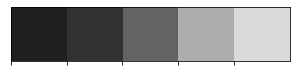

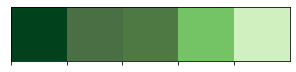

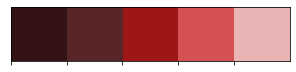

In [26]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

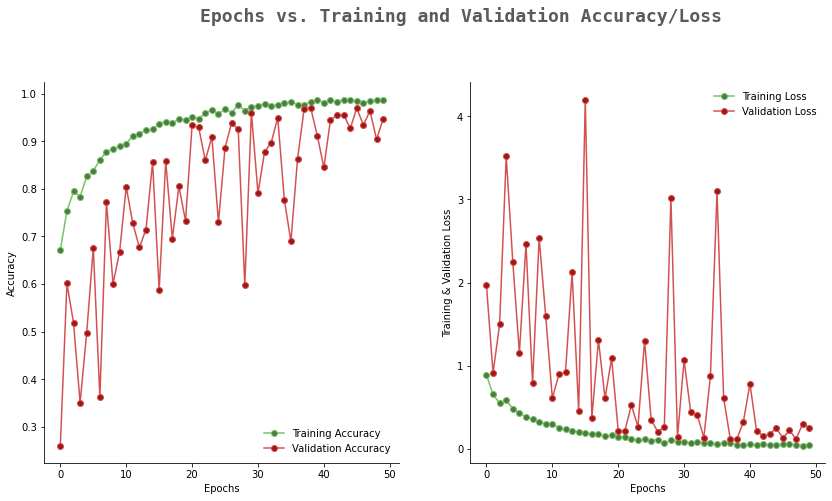

In [27]:
# filterwarnings('ignore')

epochs = [i for i in range(50)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

In [28]:
import keras
feature_extractor = keras.Model(
    inputs=model.inputs,
    outputs=model.get_layer(name="final").output,)

In [29]:
f=open("feature.csv","w")
for i in range(len(img_data)):
    img=img_data[i]
    img=np.expand_dims(img,axis=0)
    features =list( feature_extractor(img))
    for j in list(features[0]):
        f.write(str(float(j))+",")
    f.write(str(target_val[i])+"\n")    
f.close()
    

In [30]:
import pandas as pd
df=pd.read_csv(r"feature.csv",header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0. 0. 0. 1.]
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0. 0. 0. 1.]
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0. 0. 0. 1.]
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0. 0. 0. 1.]
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0. 0. 0. 1.]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[1. 0. 0. 0.]
7019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[1. 0. 0. 0.]
7020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[1. 0. 0. 0.]
7021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[1. 0. 0. 0.]


In [31]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)


In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [35]:
grid_search.best_score_

0.9918117782441626

In [36]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=30,
                       n_jobs=-1, random_state=42)

In [37]:
rf_best.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=30,
                       n_jobs=-1, random_state=42)

In [38]:
from sklearn.metrics import classification_report
y_pred=rf_best.predict(x_test)
print(classification_report(y_pred,y_test))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.99      1.00      1.00       342
[0. 0. 1. 0.]       1.00      0.99      0.99       414
[0. 1. 0. 0.]       0.99      0.99      0.99       339
[1. 0. 0. 0.]       1.00      0.99      0.99       310

     accuracy                           0.99      1405
    macro avg       0.99      0.99      0.99      1405
 weighted avg       0.99      0.99      0.99      1405



In [2]:
from keras.models import load_model
model.save("densnet121.h5")  

In [6]:
from IPython.display import display,clear_output
import io
import pickle
# Load the model from the file
with open('model_gpu.pkl', 'rb') as file:
    model_r = pickle.load(file)
import tensorflow as tf
# Load the model to extract features
model = tf.keras.models.load_model('densenet121_gpu.h5')

In [2]:
def img_pred(uploader):
        tu={
            "0":"GLIOMA",
            "1":"MENINGIOMA",
            "2":"NO TUMOUR",
            "3":"PITUTARY"
        }
        if uploader:
            img = Image.open(io.BytesIO(uploader['content']))
        else:
            print("No files have been uploaded")
#         image = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
        img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)
        # print(image)
        img=cv2.resize(img,(224,224),interpolation=cv2.INTER_LANCZOS4)
        # print(img)
        # print(img.shape)
        img=img.astype('float32')
        img/=255.0
        img=np.expand_dims(img,axis=0)
        feature_extractor = keras.Model(inputs=model.inputs,outputs=model.get_layer(name="final").output,)
        features =list(feature_extractor(img))
        l=[]
        for i in list(features):
            for j in list(i): 
                l.append(np.float32(j))
        final_features=list(np.array(l).reshape(1,-1))        
        prediction=model_r.predict(final_features)
        prediction=list(prediction)[0].strip('[]').split().index('1.')
        output=tu[str(prediction)]
        print(output)

In [3]:
from IPython.display import display,clear_output
import io
from PIL import Image
import cv2
import numpy as np
import keras

In [7]:
import ipywidgets as widgets
uploader = widgets.FileUpload()
display(uploader)
button = widgets.Button(description='Predict')
out = widgets.Output()
def on_button_clicked(_):
    with out:
        clear_output()
        for i in uploader.value:
            d=i
        img_pred(d)
button.on_click(on_button_clicked)
widgets.VBox([button,out])

FileUpload(value={}, description='Upload')